In [11]:
import numpy as np
# from tqdm.auto import tqdm
# from src.distance_measures import analyse_video, analyse_image
from src.gaussian_noise import generate_noise, generate_noise_array
from src.preprocessing import process_video
from src.gradient_descent import mean_size, find_default_params
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import label2rgb
from skimage.measure import regionprops

In [2]:
size=300
threshold=0.3

In [3]:
# %%time
im = process_video('images/cheese_gel.avi',
                   threshold=0.3,
                   skip_size=239,
                   size=400)[1]
a, t = find_default_params(im)
a, t

(2.7999999999999994, 0.15000000000000002)

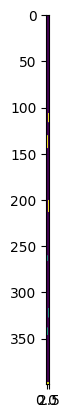

average size:  8.875


In [4]:
noise = generate_noise(size=400, threshold=t, smooth=a)[0]
plt.imshow(label2rgb(noise))
plt.show()
print('average size: ', mean_size(noise))

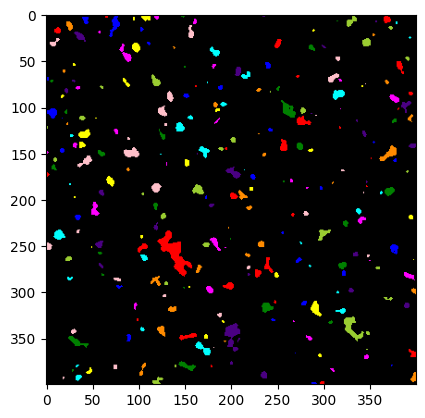

average size:  32.43971631205674


In [5]:
plt.imshow(label2rgb(im))
plt.show()
print('average size: ', mean_size(im))

In [89]:
skip_size = 5
ims = process_video('images/cheese_gel.avi',
                   threshold=0.3,
                   smooth=1,
                   skip_size=skip_size,
                   size=400)

In [90]:
means = np.zeros(len(ims))

for i in range(len(ims)):
    regions = regionprops(ims[i])
    for region in regions:
        means[i] = means[i] + region.num_pixels
    means[i] = means[i] / len(regions)

<Figure size 640x480 with 0 Axes>

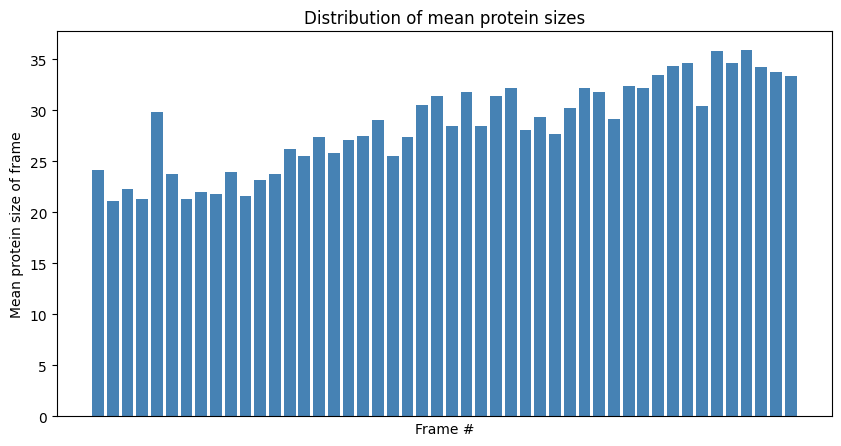

In [104]:
length = np.arange(len(means),step=1 )
# x = np.arange(len(means)*skip_size,step=1 )

plt.tight_layout()
plt.figure(figsize=(10,5))
plt.bar(length, height=means, color='steelblue')
plt.xlabel('Frame #')
plt.ylabel('Mean protein size of frame')
plt.title('Distribution of mean protein sizes')
plt.xticks([])
# plt.xlim(0,len(means))
plt.show()

